Deliverable 3: Load data from the 2022 US census using APIs

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Loading Dataset

file_path = "C:\\Users\\Directory\\Downloads\\\\ProjectDB4\\Deliverable4Data.csv"

# Read the CSV file into a DataFrame
Final_Project= pd.read_csv(file_path)


In [3]:
Final_Project.describe()
Final_Project


,Zip Code,Annual Household Income($),High school graduate(%),Population with Bachelor's degree(%),Population with master's or professional degree(%),Poverty Level(%),Home Value($),Total Population,Transaction Month and Year,Make,...,Number of EV Stations,Dem %,GRN %,LIB %,PSL %,REP %,SWP %,WRI %,Winner,Total Votes Cast
0,99169,78985,25.4,17.7,7.9,7.1,167500,2494,5/1/2020,CHEVROLET,...,3.0,0.309451,0.003071,0.013988,0.001706,0.666496,0.000853,0.004435,REP,"5,862"
1,99169,78985,25.4,17.7,7.9,7.1,167500,2494,2/1/2021,CHEVROLET,...,3.0,0.309451,0.003071,0.013988,0.001706,0.666496,0.000853,0.004435,REP,"5,862"
2,99169,78985,25.4,17.7,7.9,7.1,167500,2494,6/1/2021,CHEVROLET,...,3.0,0.309451,0.003071,0.013988,0.001706,0.666496,0.000853,0.004435,REP,"5,862"
3,99169,78985,25.4,17.7,7.9,7.1,167500,2494,6/1/2021,TESLA,...,3.0,0.309451,0.003071,0.013988,0.001706,0.666496,0.000853,0.004435,REP,"5,862"
4,99169,78985,25.4,17.7,7.9,7.1,167500,2494,12/1/2021,FORD,...,3.0,0.309451,0.003071,0.013988,0.001706,0.666496,0.000853,0.004435,REP,"5,862"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133214,98953,96901,24.3,14.0,8.5,11.3,349400,7043,12/1/2023,TESLA,...,2.0,0.448879,0.003337,0.014814,0.001601,0.525558,0.000821,0.004990,REP,"96,193"
133215,98953,96901,24.3,14.0,8.5,11.3,349400,7043,12/1/2023,TESLA,...,2.0,0.448879,0.003337,0.014814,0.001601,0.525558,0.000821,0.004990,REP,"96,193"
133216,98953,96901,24.3,14.0,8.5,11.3,349400,7043,1/1/2024,TESLA,...,2.0,0.448879,0.003337,0.014814,0.001601,0.525558,0.000821,0.004990,REP,"96,193"
133217,98953,96901,24.3,14.0,8.5,11.3,349400,7043,1/1/2024,KIA,...,2.0,0.448879,0.003337,0.014814,0.001601,0.525558,0.000821,0.004990,REP,"96,193"


In [4]:
#Converting columns to numeric
selected_columns = ['Annual Household Income($)', 'High school graduate(%)', "Population with Bachelor's degree(%)",\
                    "Population with master's or professional degree(%)","Poverty Level(%)", "Home Value($)",\
                    "Total Population", "Number of EV Stations", 'Grand Total','# Sales 2020','# Sales 2021',\
                    '# Sales 2022','# Sales 2023','# Sales 2024','Dem %','REP %','GRN %','LIB %','PSL %','Grand Total','Number of EV Stations']

for column in selected_columns:
    Final_Project[column] = pd.to_numeric(Final_Project[column], errors='coerce')


In [5]:
# Check for missing values in each column
missing_values = Final_Project.isna().sum()
print(missing_values)

Zip Code                                              0
Annual Household Income($)                            0
High school graduate(%)                               0
Population with Bachelor's degree(%)                  0
Population with master's or professional degree(%)    0
Poverty Level(%)                                      0
Home Value($)                                         0
Total Population                                      0
Transaction Month and Year                            0
Make                                                  0
Model                                                 0
Model Year                                            0
Fuel Type Primary                                     0
County                                                0
State                                                 0
# Sales 2020                                          0
# Sales 2021                                          0
# Sales 2022                                    

In [6]:
#Drop columns where census data is missing 
Final_Project.dropna(subset=['Annual Household Income($)'], inplace=True)

#Drop columns where Home value is negative
#Final_Project = Final_Project[Final_Project['Home Value($)'] >= 0]

#replace all negative columns in census data with 0
# Convert columns to numeric type
Final_Project1= Final_Project.apply(pd.to_numeric, errors='coerce')
Final_Project1 = Final_Project1.applymap(lambda x: max(0, x))

# Print the columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


In [7]:
#Aggregate Data by Zip code
aggregated_data = Final_Project1.groupby('Zip Code').agg({'Annual Household Income($)': 'mean', 'High school graduate(%)': 'mean',"Population with Bachelor's degree(%)" :'mean', 
    "Population with master's or professional degree(%)" :'mean',"Poverty Level(%)" :'mean',"Home Value($)" :'mean',
    'Total Population':'mean','# Sales 2020': 'mean','# Sales 2021': 'mean','# Sales 2022': 'mean','# Sales 2023': 'mean',\
    '# Sales 2024': 'mean', 'Grand Total': 'mean', 'Number of EV Stations' : 'mean', 'Dem %' : 'mean','REP %' : 'mean',\
    'GRN %': 'mean','LIB %': 'mean','PSL %': 'mean'})
aggregated_data['Dem %'] = aggregated_data['Dem %']*100
aggregated_data['REP %'] = aggregated_data['REP %']*100
aggregated_data['LIB %'] = aggregated_data['LIB %']*100

In [8]:
#Random Forest
#filepath ="C:\\Users\\Directory\\Downloads\\\\ProjectDB4\\AggregateData.csv"
#aggregated_data.to_csv(filepath, index=False)

aggregated_data

,Annual Household Income($),High school graduate(%),Population with Bachelor's degree(%),Population with master's or professional degree(%),Poverty Level(%),Home Value($),Total Population,# Sales 2020,# Sales 2021,# Sales 2022,# Sales 2023,# Sales 2024,Grand Total,Number of EV Stations,Dem %,REP %,GRN %,LIB %,PSL %
Zip Code,,,,,,,,,,,,,,,,,,,
98001,127394.0,25.6,20.6,8.1,8.3,483900.0,35842.0,48.0,117.0,142.0,248.0,36.0,591.0,6.0,74.952892,22.235890,0.004677,1.499207,0.001330
98002,81661.0,31.9,12.2,4.8,10.7,354900.0,36812.0,24.0,26.0,47.0,100.0,14.0,211.0,6.0,74.952892,22.235890,0.004677,1.499207,0.001330
98003,86274.0,28.9,19.6,8.1,14.7,403200.0,51329.0,30.0,67.0,112.0,221.0,41.0,471.0,11.0,74.952892,22.235890,0.004677,1.499207,0.001330
98004,241568.0,7.1,35.3,39.5,5.3,1862200.0,39161.0,310.0,487.0,637.0,834.0,185.0,2453.0,158.0,74.952892,22.235890,0.004677,1.499207,0.001330
98005,212891.0,7.7,33.9,36.7,8.1,1242200.0,22030.0,120.0,182.0,261.0,417.0,98.0,1078.0,69.0,74.952892,22.235890,0.004677,1.499207,0.001330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99360,80291.0,19.6,12.0,6.2,9.7,400000.0,1400.0,0.0,2.0,0.0,2.0,1.0,5.0,0.0,43.792585,52.461534,0.004223,2.459934,0.001599
99361,90492.0,16.4,17.3,4.9,9.8,265800.0,1668.0,4.0,0.0,2.0,2.0,0.0,8.0,1.0,43.792585,52.461534,0.004223,2.459934,0.001599
99362,88254.0,21.7,16.7,13.3,11.4,348000.0,43028.0,33.0,59.0,73.0,94.0,11.0,270.0,19.0,43.792585,52.461534,0.004223,2.459934,0.001599


In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score


# Select features and target variable
X = aggregated_data[['Annual Household Income($)', 'High school graduate(%)', 'Population with Bachelor\'s degree(%)', \
        'Population with master\'s or professional degree(%)', 'Poverty Level(%)', 'Home Value($)', 'Total Population',\
                  '# Sales 2022','Dem %','REP %','Number of EV Stations']]

y = aggregated_data['# Sales 2023']  

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the random forest regressor
regressor = RandomForestRegressor(n_estimators= 100, random_state=0)


rf = regressor.fit(X_train, y_train)

# Making predictions on the training set
y_pred_train = rf.predict(X_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

results=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
print(results)
r_Square = regressor.score(X_test,y_test)
print("r_square: ",r_Square )

          Actual  Predicted
Zip Code                   
98148      144.0     128.67
98643        0.0       0.96
99324       16.0      19.83
98952        0.0       1.75
98332      226.0     231.52
...          ...        ...
98312      162.0     133.65
98220        1.0       2.24
98516      259.0     185.36
99116        1.0       2.14
98031      350.0     277.92

[153 rows x 2 columns]
r_square:  0.9609732111486761


In [41]:
# The training r-square

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error of random forest model:", mae)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error of random forest model:", mse)


Mean Absolute Error of random forest model: 15.705032679738562
Mean Squared Error of random forest model: 913.7912529411766


In [42]:
# Computing R-squared value for the training set
r2_train = r2_score(y_train, y_pred_train)

# Computing R-squared value for the testing set
r2_test = r2_score(y_test, y_pred)

print("R-squared value for the training set:", r2_train)
print("R-squared value for the testing set:", r2_test)
#param_grid = {
 #   'n_estimators':[100,200,300],
  #  'max_depth': [10,20,30],
   # 'min_samples_split':[2,5,10],
    #'min_samples_leaf':[1,2,4]   
#}


R-squared value for the training set: 0.9962004296816878
R-squared value for the testing set: 0.9609732111486761


In [43]:
import statsmodels.api as sm
# Printing actual values with highest residuals
residuals = np.abs(y_test - y_pred)
residuals = pd.DataFrame(residuals)

residuals.columns= ['residuals']

highest_residual_indices = residuals.sort_values(by='residuals', ascending=False)
top_5 = highest_residual_indices.head(5)
top5merge= pd.merge(top_5, results, on='Zip Code', how='left')
print(top5merge)



normality_test = sm.stats.omni_normtest(residuals)
normality_test

          residuals  Actual  Predicted
Zip Code                              
98188        175.40   354.0     178.60
98607        140.95   543.0     683.95
98121         97.73   302.0     399.73
98057         96.44   228.0     131.56
98119         94.40   259.0     353.40


NormaltestResult(statistic=array([130.2755514]), pvalue=array([5.14071409e-29]))

In [13]:
# Find the maximum residual value
max_residual = max(residuals)

print(max_residual)

residuals


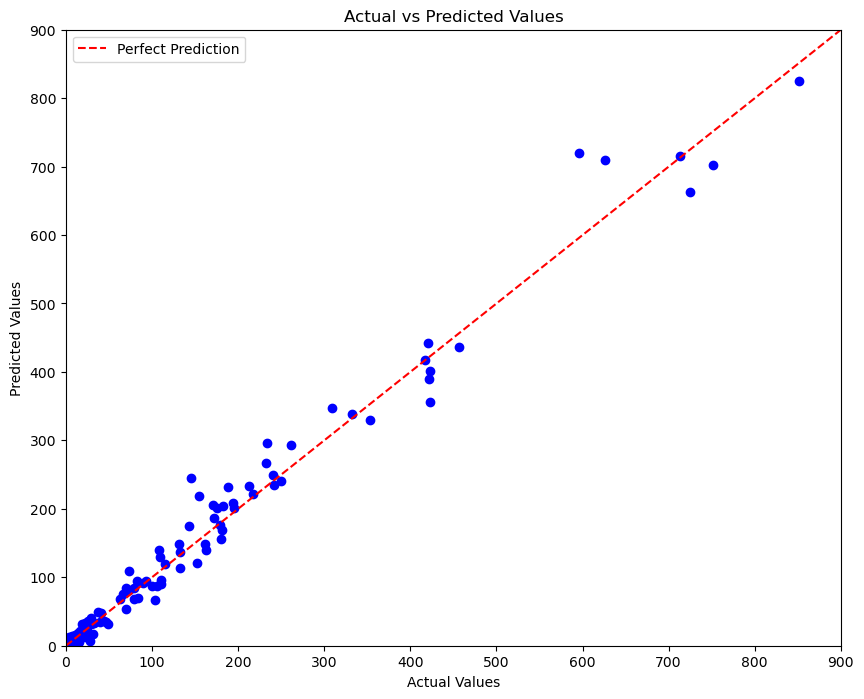

In [14]:
import matplotlib.pyplot as plt 
# Plot the scatter plot
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_pred, color='blue')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlim(0,900)
plt.ylim(0,900)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(100))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(100))
plt.legend()
plt.show()

In [15]:
plt.close()
#Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Prepare data: select features and target variable
X = aggregated_data[['Annual Household Income($)', 'High school graduate(%)', 'Population with Bachelor\'s degree(%)', \
        'Population with master\'s or professional degree(%)', 'Poverty Level(%)', 'Home Value($)', 'Total Population',\
      '# Sales 2022','Dem %','REP %','Number of EV Stations']]

y = aggregated_data['# Sales 2023'] 

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)
results=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
print(results)
r_Square = regressor.score(X_test,y_test)
print("r_square: ",r_Square )

          Actual   Predicted
Zip Code                    
98148      144.0  124.206494
98643        0.0   -0.220373
99324       16.0   24.394527
98952        0.0   -1.461277
98332      226.0  227.418492
...          ...         ...
98312      162.0  153.561363
98220        1.0   -2.547308
98516      259.0  174.083087
99116        1.0   -1.697616
98031      350.0  282.719702

[153 rows x 2 columns]
r_square:  0.9672420684843751


In [17]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error of linear regression model:", mae)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error of linear regression model:", mse)

Mean Absolute Error of linear regression model: 15.107080157993877
Mean Squared Error of linear regression model: 767.0093329343612


In [18]:
import statsmodels.api as sm
# Printing actual values with highest residuals
residuals = np.abs(y_test - y_pred)
residuals = pd.DataFrame(residuals)

residuals.columns= ['residuals']

highest_residual_indices = residuals.sort_values(by='residuals', ascending=False)
top_5 = highest_residual_indices.head(5)
top5merge= pd.merge(top_5, results, on='Zip Code', how='left')
print(top5merge)



normality_test = sm.stats.omni_normtest(residuals)
normality_test

           residuals  Actual   Predicted
Zip Code                                
98188     183.835882   354.0  170.164118
98057     109.677732   228.0  118.322268
98033      97.380310   827.0  924.380310
98516      84.916913   259.0  174.083087
98031      67.280298   350.0  282.719702


NormaltestResult(statistic=array([154.56341993]), pvalue=array([2.73514157e-34]))

In [19]:
# Computing R-squared value for the testing set
r2_test = r2_score(y_test, y_pred)

# Making predictions on the entire dataset
y_pred_all = rf.predict(X)

# Computing R-squared value for the entire dataset
r2_all = r2_score(y, y_pred_all)

print("R-squared value for the testing set:", r2_test)
print("R-squared value for the actual set:", r2_all)

R-squared value for the testing set: 0.9672420684843751
R-squared value for the actual set: 0.9845360155049038


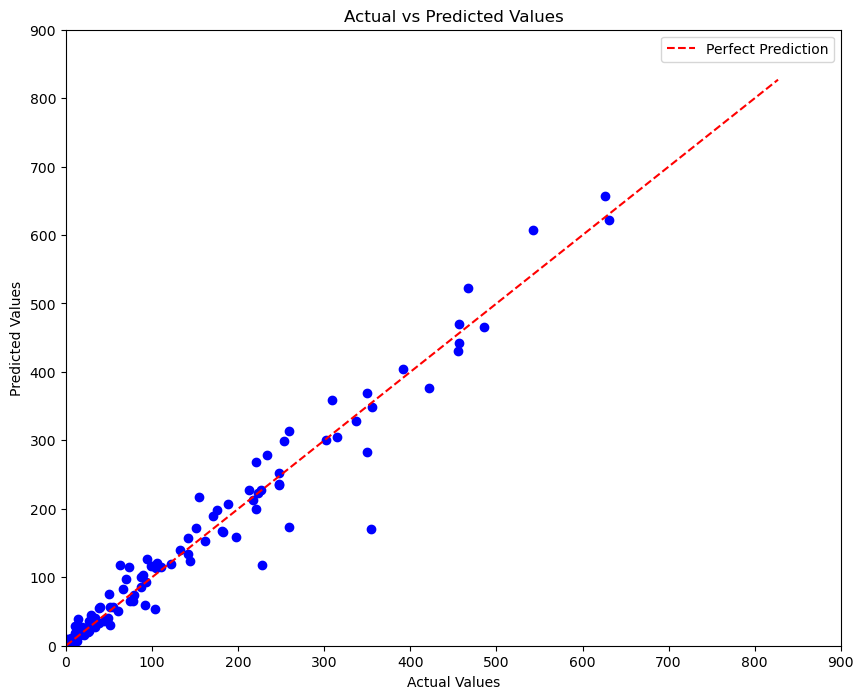

In [20]:
import matplotlib.pyplot as plt 
# Plot the scatter plot
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_pred, color='blue')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlim(0,900)
plt.ylim(0,900)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(100))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(100))
plt.legend()
plt.show()

In [21]:
import statsmodels.api as sm
residuals = y_test - y_pred
normality_test = sm.stats.omni_normtest(residuals)
normality_test

NormaltestResult(statistic=100.39462251383085, pvalue=1.5833783949685184e-22)

# Visuals

In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patheffects import withStroke

In [23]:
 print(Final_Project['County'])

0          Adams
1          Adams
2          Adams
3          Adams
4          Adams
           ...  
133214    Yakima
133215    Yakima
133216    Yakima
133217    Yakima
133218    Yakima
Name: County, Length: 133219, dtype: object


In [24]:
Visual_data = Final_Project[['Zip Code', 'County']].drop_duplicates().copy()
#Create dataset
data = aggregated_data['Grand Total' ]

In [25]:
data = pd.merge(Visual_data,data, on = 'Zip Code', how = 'inner')
data

,Zip Code,County,Grand Total
0,99169,Adams,10.0
1,99341,Adams,1.0
2,99344,Adams,36.0
3,99344,Franklin,36.0
4,99344,Grant,36.0
...,...,...,...
543,98947,Yakima,4.0
544,98948,Yakima,10.0
545,98951,Yakima,13.0
546,98952,Yakima,1.0


In [26]:
#file_path = "C:\\Users\\Directory\\Downloads\\\\ProjectDB4\\tl_2022_us_zcta520\\tl_2022_us_zcta520.shp"
#zip_codes = gpd.read_file(file_path)

In [27]:
file_path = "C:\\Users\\Directory\\Downloads\\\\ProjectDB4\\WA_County_Boundaries\\WA_County_Boundaries.shp"
County = gpd.read_file(file_path)

In [28]:
print((data))
print(type(County))

     Zip Code    County  Grand Total
0       99169     Adams         10.0
1       99341     Adams          1.0
2       99344     Adams         36.0
3       99344  Franklin         36.0
4       99344     Grant         36.0
..        ...       ...          ...
543     98947    Yakima          4.0
544     98948    Yakima         10.0
545     98951    Yakima         13.0
546     98952    Yakima          1.0
547     98953    Yakima         29.0

[548 rows x 3 columns]
<class 'geopandas.geodataframe.GeoDataFrame'>


In [29]:
aggregate_Visual = data.groupby('County').agg({'Grand Total': 'sum'})

In [30]:
if not isinstance(aggregate_Visual, pd.DataFrame):
    aggregate_Visual = pd.DataFrame(aggregate_Visual)

data.reset_index(inplace=True)
print((aggregate_Visual))

              Grand Total
County                   
Adams                47.0
Asotin               59.0
Benton             1676.0
Chelan              712.0
Clallam             747.0
Clark              9472.0
Columbia             12.0
Cowlitz             847.0
Douglas             272.0
Ferry                37.0
Franklin            485.0
Garfield              2.0
Grant               452.0
Grays Harbor        409.0
Island             1313.0
Jefferson          1030.0
King              70643.0
Kitsap             4402.0
Kittitas            417.0
Klickitat           273.0
Lewis               561.0
Lincoln              42.0
Mason               557.0
Okanogan            190.0
Pacific             171.0
Pend Oreille         70.0
Pierce            11746.0
San Juan           1005.0
Skagit             2073.0
Skamania            729.0
Snohomish         17764.0
Spokane            3729.0
Stevens             251.0
Thurston           4182.0
Wahkiakum            40.0
Walla Walla         341.0
Whatcom     

In [31]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [32]:
Countyfixed = County.rename(columns={'JURISDIC_2': 'County'},inplace = False)
#zip_codesfixed = zip_codesfixed["Zip Code"].apply(pd.to_numeric, errors='coerce')
#zip_codesfixed["Zip Code"] = zip_codesfixed["Zip Code"].astype('int64')
#print(type(zip_codesfixed))
#County['County'] = County['NAMELSAD'].str.split(' County').str[0]

In [33]:
print(data)

     index  Zip Code    County  Grand Total
0        0     99169     Adams         10.0
1        1     99341     Adams          1.0
2        2     99344     Adams         36.0
3        3     99344  Franklin         36.0
4        4     99344     Grant         36.0
..     ...       ...       ...          ...
543    543     98947    Yakima          4.0
544    544     98948    Yakima         10.0
545    545     98951    Yakima         13.0
546    546     98952    Yakima          1.0
547    547     98953    Yakima         29.0

[548 rows x 4 columns]


In [34]:
# Check data types of 'Zip Code' column
#print("zip_codesfixed 'Zip Code' dtype:", zip_codesfixed['Zip Code'].dtype)
#print("data 'Zip Code' dtype:", data['Zip Code'].dtype)
print(Countyfixed)

    OBJECTID  JURISDICT_  JURISDIC_1        County           JURISDIC_3  \
0     118333          25           4         Grant         Grant County   
1     122494          33           4      Garfield      Garfield County   
2     122856           8           4        Island        Island County   
3     123484     4699350           4      Kittitas      Kittitas County   
4     123528          35           4   Walla Walla   Walla Walla County   
5     123547          34           4      Columbia      Columbia County   
6     123550           3           4      San Juan      San Juan County   
7     123590          32           4        Asotin        Asotin County   
8     123607          29           4      Franklin      Franklin County   
9     123639     4698174           4  Pend Oreille  Pend Oreille County   
10    123664           7           4       Clallam       Clallam County   
11    123665          28           4       Pacific       Pacific County   
12    123669     4698173 

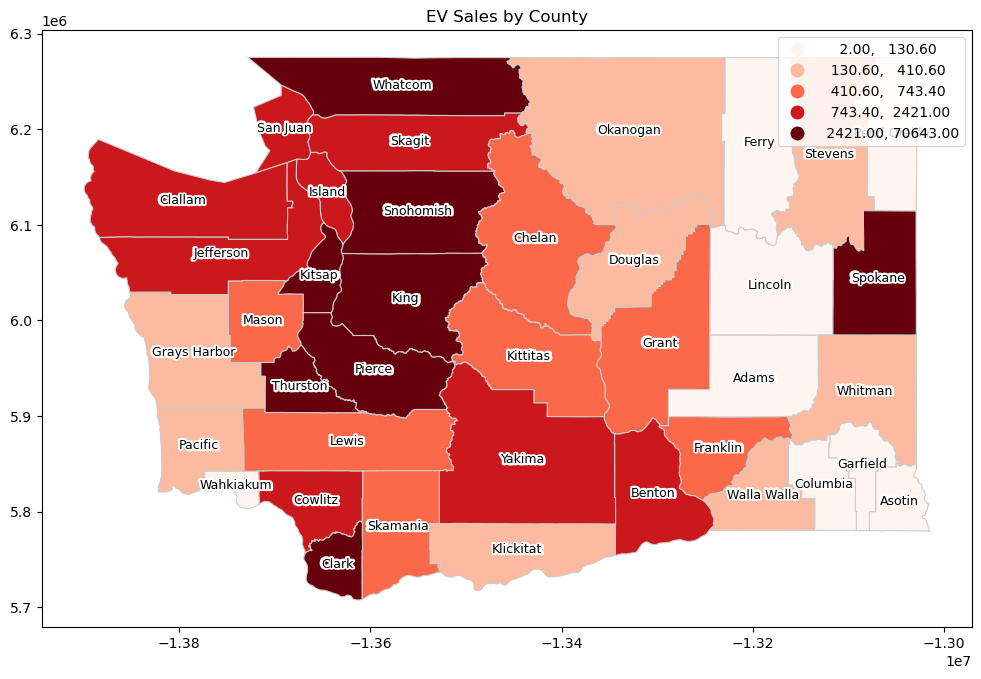

<Figure size 640x480 with 0 Axes>

In [35]:
#zip_codes = zip_codesfixed.set_geometry('geometry')
Visual = gpd.GeoDataFrame(pd.merge(Countyfixed, aggregate_Visual, on='County'))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the GeoDataFrame
Visual.plot(column='Grand Total', cmap='Reds', linewidth=.8, ax=ax, edgecolor='0.8',legend=True, scheme='quantiles')

for idx, row in Visual.iterrows():
    # Get the centroid of the polygon
    centroid = row['geometry'].centroid
    # Add the county name as text at the centroid
    # Add the county name with a black outline
    ax.text(centroid.x, centroid.y, row['County'], fontsize=9, ha='center', va='center', color='white', 
            path_effects=[withStroke(linewidth=3, foreground='white')])
    # Add the county name with white text
    ax.text(centroid.x, centroid.y, row['County'], fontsize=9, ha='center', va='center', color='black')

# Set the title
ax.set_title('EV Sales by County')

# Show the plot
plt.show()
plt.savefig('choropleth_map.png')

In [36]:
top_5_sales = Visual.nsmallest(5, 'Grand Total')
print(top_5_sales)

    OBJECTID  JURISDICT_  JURISDIC_1     County        JURISDIC_3  JURISDIC_4  \
1     122494          33           4   Garfield   Garfield County          12   
5     123547          34           4   Columbia   Columbia County           7   
37    123952           9           4      Ferry      Ferry County          10   
28    123932          30           4  Wahkiakum  Wahkiakum County          35   
25    123844          15           4    Lincoln    Lincoln County          22   

    JURISDIC_5 JURISDIC_6   EDIT_DATE  EDIT_STATU EDIT_WHO  \
1        53023       None  2022-06-23           1  TSTE490   
5        53013       None  2015-10-14           1  JDUG490   
37       53019       None  2024-01-25           1  TSTE490   
28       53069       None  2023-03-29           1  TSTE490   
25       53043       None  2022-08-10           1  TSTE490   

                                  GLOBALID  \
1   {610C1CA8-E5EF-4B44-9EF0-4EC655FFCD63}   
5   {4DBD8D11-6B8F-4770-8F53-B8231AC01769}   
37

In [37]:
ax.axis('off')
plt.show()

<Axes: >

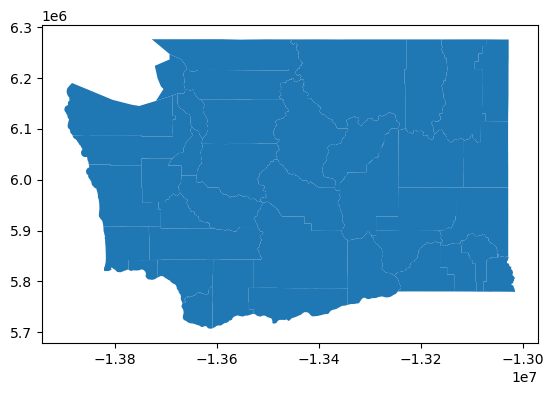

In [38]:
Visual.plot()

In [39]:
print(Visual)

    OBJECTID  JURISDICT_  JURISDIC_1        County           JURISDIC_3  \
0     118333          25           4         Grant         Grant County   
1     122494          33           4      Garfield      Garfield County   
2     122856           8           4        Island        Island County   
3     123484     4699350           4      Kittitas      Kittitas County   
4     123528          35           4   Walla Walla   Walla Walla County   
5     123547          34           4      Columbia      Columbia County   
6     123550           3           4      San Juan      San Juan County   
7     123590          32           4        Asotin        Asotin County   
8     123607          29           4      Franklin      Franklin County   
9     123639     4698174           4  Pend Oreille  Pend Oreille County   
10    123664           7           4       Clallam       Clallam County   
11    123665          28           4       Pacific       Pacific County   
12    123669     4698173 